In [47]:
import pandas as pd
import mysql.connector
import numpy as np
import re
from difflib import SequenceMatcher
import unidecode

# Spotify df

In [48]:
spotify_df = pd.read_csv("raw_data/spotify_dataset.csv")
spotify_df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [49]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [50]:
spotify_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


In [51]:
spotify_df.describe(include=['object']).T

,count,unique,top,freq
track_id,114000,89741,6S3JlDAGk3uu3NtZbPnuhS,9
artists,113999,31437,The Beatles,279
album_name,113999,46589,Alternative Christmas 2022,195
track_name,113999,73608,Run Rudolph Run,151
track_genre,114000,114,acoustic,1000


## Calidad de los datos

### Completititud

In [52]:
spotify_df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [53]:
spotify_df[spotify_df['artists'].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


### Unicidad

In [54]:
spotify_df.duplicated().sum()

0

In [55]:
spotify_df.duplicated(subset=['track_id']).sum()

24259

### Consistencia

In [56]:
spotify_df.groupby('track_id')['track_name'].nunique()

track_id
0000vdREvCVMxbQTkS888c    1
000CC8EParg64OmTxVnZ0p    1
000Iz0K615UepwSJ5z2RE5    1
000RDCYioLteXcutOjeweY    1
000qpdoc97IMTBvF8gwcpy    1
                         ..
7zxHiMmVLt4LGWpOMqOpUh    1
7zxpdh3EqMq2JCkOI0EqcG    1
7zyYmIdjqqiX6kLryb7QBx    1
7zybSU9tFO9HNlwmGF7stc    1
7zz7iNGIWhmfFE7zlXkMma    1
Name: track_name, Length: 89741, dtype: int64

In [57]:
spotify_df.groupby('track_id')['artists'].nunique()

track_id
0000vdREvCVMxbQTkS888c    1
000CC8EParg64OmTxVnZ0p    1
000Iz0K615UepwSJ5z2RE5    1
000RDCYioLteXcutOjeweY    1
000qpdoc97IMTBvF8gwcpy    1
                         ..
7zxHiMmVLt4LGWpOMqOpUh    1
7zxpdh3EqMq2JCkOI0EqcG    1
7zyYmIdjqqiX6kLryb7QBx    1
7zybSU9tFO9HNlwmGF7stc    1
7zz7iNGIWhmfFE7zlXkMma    1
Name: artists, Length: 89741, dtype: int64

In [58]:
spotify_df.groupby(['album_name','track_name']).size().reset_index(name='count')

,album_name,track_name,count
0,! ! ! ! ! Whispers ! ! ! ! !,Static Rainstorm,1
1,! ! ! ! 300 Sounds of the Ocean ! ! ! !,Fast Water Background,1
2,! ! % > (( Shelter )) < % ! !,Pink Noise Waves,1
3,"! !""#Reboot#""! !",Transport,1
4,"!!!"" Baby Sleep Aid Rain Sounds ""!!!",Fall Asleep Rain,1
...,...,...,...
88178,공감 (Empathy) - The 1st Mini Album,I'm Gonna Love You,1
88179,공감 (Empathy) - The 1st Mini Album,Rose - English Version,1
88180,당신이 잠든 사이에 Pt. 1 Original Television Soundtrack,긴 밤이 오면,2
88181,당신이 잠든 사이에 Pt. 2 Original Television Soundtrack,It's You,1


In [59]:
spotify_df.groupby('track_id')['duration_ms'].nunique()

track_id
0000vdREvCVMxbQTkS888c    1
000CC8EParg64OmTxVnZ0p    1
000Iz0K615UepwSJ5z2RE5    1
000RDCYioLteXcutOjeweY    1
000qpdoc97IMTBvF8gwcpy    1
                         ..
7zxHiMmVLt4LGWpOMqOpUh    1
7zxpdh3EqMq2JCkOI0EqcG    1
7zyYmIdjqqiX6kLryb7QBx    1
7zybSU9tFO9HNlwmGF7stc    1
7zz7iNGIWhmfFE7zlXkMma    1
Name: duration_ms, Length: 89741, dtype: int64

### Validación

In [60]:
num_cols = ['popularity','duration_ms','danceability','energy','speechiness',
            'acousticness','instrumentalness','liveness','valence','key','mode','tempo','time_signature']

spotify_df[num_cols].agg(['min','max']).T

,min,max
popularity,0.0,100.000
duration_ms,0.0,5237295.000
danceability,0.0,0.985
energy,0.0,1.000
speechiness,0.0,0.965
acousticness,0.0,0.996
instrumentalness,0.0,1.000
liveness,0.0,1.000
valence,0.0,0.995
key,0.0,11.000


In [61]:
invalid_duration = spotify_df[spotify_df['duration_ms'] == 0]
invalid_duration

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [62]:
invalid_tempo = spotify_df[spotify_df['tempo'] == 0]
print(f"Número de registros con tempo = 0: {len(invalid_tempo)}")
invalid_tempo

Número de registros con tempo = 0: 157


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
4131,4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.0,0.03620,...,-22.519,0,0.0,0.994000,0.940,0.0958,0.0,0.0,0,ambient
4379,4379,4acmzQsAeMJa5sGFSog7fu,Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,The End of Childhood (feat. Jack Liebeck),55,73266,False,0.0,0.04450,...,-26.440,0,0.0,0.972000,0.972,0.0873,0.0,0.0,0,ambient
4664,4664,1Kb2DqjHRvOcT5xeWtz3t5,Sylvain Chauveau,Des Plumes Dans La Tête,Ferme Les Yeux,53,68493,False,0.0,0.03230,...,-23.636,0,0.0,0.994000,0.973,0.0922,0.0,0.0,0,ambient
45670,45670,6B9Mgf9smWqxDjA35VD6MK,Little Symphony,Rialto Beach,Campomoro,22,148711,False,0.0,0.00108,...,-30.204,1,0.0,0.952000,0.991,0.2420,0.0,0.0,0,guitar
45720,45720,7i5OoyPXtSrqz9jobJfG1F,Little Symphony,Rialto Beach,Ritornello,23,102000,False,0.0,0.00129,...,-29.445,1,0.0,0.969000,0.956,0.1230,0.0,0.0,0,guitar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101988,101988,5gEKRH0MCSegG8ZISUPaU2,Granular,The World Of,Tin White Noise,32,182050,False,0.0,0.00002,...,-16.187,1,0.0,0.003850,0.903,0.9210,0.0,0.0,0,sleep
101993,101993,6H0kAiSAFB84jX7dgEDWd6,Rain Sounds,Rain,Rain: Natural Recording,32,84219,False,0.0,0.02540,...,-19.925,1,0.0,0.000002,0.838,0.3390,0.0,0.0,0,sleep
113428,113428,5EYzrykQ95uOmepteDi9KT,El Ruido Blanco;Soñoliento Juan;Mantra para Do...,Aire Acondicionado de Ruido Blanco,Aire de verano,27,128000,False,0.0,0.18800,...,-25.837,0,0.0,0.139000,0.339,0.1220,0.0,0.0,0,world-music
113688,113688,2EnZf7wbFv7ST4CJ3EvNzT,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,Ruido Rosa Puro - Una Hora Versión,24,3601693,False,0.0,0.00002,...,-11.165,1,0.0,0.186000,1.000,0.3620,0.0,0.0,0,world-music


In [63]:
invalid_time_sig = spotify_df[spotify_df['time_signature'] == 0]
print(f"Número de registros con time_signature = 0: {len(invalid_time_sig)}")
invalid_time_sig

Número de registros con time_signature = 0: 163


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2926,2926,0jdfbvSdaWvxfAlD20TtNc,Yaşlı Amca,Akşamüstü,Sanki Yapamadım,44,213198,False,0.442,0.56700,...,-6.346,0,0.0516,0.238000,0.000325,0.0852,0.639,138.616,0,alt-rock
4131,4131,59gg6zQhSKGVnkT3hWAY3l,Max Richter;Lang Lang,Voyager - Essential Max Richter,The Departure,64,151506,False,0.000,0.03620,...,-22.519,0,0.0000,0.994000,0.940000,0.0958,0.000,0.000,0,ambient
4379,4379,4acmzQsAeMJa5sGFSog7fu,Dario Marianelli;Jack Liebeck;Benjamin Wallfisch,Jane Eyre - Original Motion Picture Soundtrack,The End of Childhood (feat. Jack Liebeck),55,73266,False,0.000,0.04450,...,-26.440,0,0.0000,0.972000,0.972000,0.0873,0.000,0.000,0,ambient
4664,4664,1Kb2DqjHRvOcT5xeWtz3t5,Sylvain Chauveau,Des Plumes Dans La Tête,Ferme Les Yeux,53,68493,False,0.000,0.03230,...,-23.636,0,0.0000,0.994000,0.973000,0.0922,0.000,0.000,0,ambient
26910,26910,7HSc2wpHlXKIl8SCZK7zsP,Benny Martin,Here Comes the Sun (Piano Instrumental),Here Comes the Sun (Piano Instrumental),18,203705,False,0.329,0.06070,...,-28.310,1,0.0507,0.994000,0.880000,0.0858,0.421,93.948,0,disney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101993,101993,6H0kAiSAFB84jX7dgEDWd6,Rain Sounds,Rain,Rain: Natural Recording,32,84219,False,0.000,0.02540,...,-19.925,1,0.0000,0.000002,0.838000,0.3390,0.000,0.000,0,sleep
112172,112172,0jdfbvSdaWvxfAlD20TtNc,Yaşlı Amca,Akşamüstü,Sanki Yapamadım,44,213198,False,0.442,0.56700,...,-6.346,0,0.0516,0.238000,0.000325,0.0852,0.639,138.616,0,turkish
113428,113428,5EYzrykQ95uOmepteDi9KT,El Ruido Blanco;Soñoliento Juan;Mantra para Do...,Aire Acondicionado de Ruido Blanco,Aire de verano,27,128000,False,0.000,0.18800,...,-25.837,0,0.0000,0.139000,0.339000,0.1220,0.000,0.000,0,world-music
113688,113688,2EnZf7wbFv7ST4CJ3EvNzT,El Ruido Blanco,Ruido Blanco para el bebé: sonidos relajantes ...,Ruido Rosa Puro - Una Hora Versión,24,3601693,False,0.000,0.00002,...,-11.165,1,0.0000,0.186000,1.000000,0.3620,0.000,0.000,0,world-music


In [64]:
tempo_zero = len(spotify_df[spotify_df['tempo'] == 0])
time_sig_zero = len(spotify_df[spotify_df['time_signature'] == 0])

print(f"Porcentaje de registros con tempo = 0: {tempo_zero/len(spotify_df)*100:.4f}%")
print(f"Porcentaje de registros con time_signature = 0: {time_sig_zero/len(spotify_df)*100:.4f}%")

either_zero = len(spotify_df[(spotify_df['tempo'] == 0) | (spotify_df['time_signature'] == 0)])
print(f"Porcentaje de registros con tempo = 0 o time_signature = 0: {either_zero/len(spotify_df)*100:.4f}%")

Porcentaje de registros con tempo = 0: 0.1377%
Porcentaje de registros con time_signature = 0: 0.1430%
Porcentaje de registros con tempo = 0 o time_signature = 0: 0.1430%


### Exactitud

In [65]:
spotify_df.groupby('track_id').agg({'track_name':'nunique', 'artists':'nunique' }).query('track_name > 1 or artists > 1')

,track_name,artists
track_id,,


In [66]:
spotify_df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

## Observaciones

**1. Completitud**: una fila contiene tres valores nulos en los atributos: artist, album_name y track_name.

**2. Unicidad**: track_id aparece duplicado, pues las canciones pueden tener más de un género, no es un error.

**3. Consistencia**: no hay inconsistencias entre los duplicados por track_id. 

**4. Validación**: los rangos de todas las variables son correctos, a excepción del atributo tempo y time signature que presentan valores de 0 que no son posibles. Representan menos del 1.5% de los datos. Además hay un registro con duración = 0, que corresponde a la fila con atributos artist, album_name y track_name nulos, por lo que esta fila se eliminará en la limpieza.

**5. Exactitud**: se cumple la exactitud de los datos en los géneros y en los nombres de las canciones y los artistas.

Para este conjunto de datos no aplica oportunidad, puesto que no tiene fechas que evaluar. 

La columna 'Unnamed: 0' no aporta información relevante, solo representa un índice.


# Grammy Awards df

In [67]:
grammy_df = pd.read_csv("raw_data/the_grammy_awards.csv", parse_dates=['published_at', 'updated_at'])
grammy_df

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28-07:00,2020-05-19 05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28-07:00,2020-05-19 05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28-07:00,2020-05-19 05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28-07:00,2020-05-19 05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 05:10:28-07:00,2020-05-19 05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True
...,...,...,...,...,...,...,...,...,...,...
4805,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45-08:00,2019-09-10 01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...,NaN,"Van Cliburn, artist (Symphony Of The Air Orche...",NaN,True
4806,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45-08:00,2019-09-10 01:11:09-07:00,Best Classical Performance - Instrumentalist (...,Segovia Golden Jubilee,NaN,"Andres Segovia, artist",https://www.grammy.com/sites/com/files/styles/...,True
4807,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45-08:00,2019-09-10 01:11:09-07:00,Best Classical Performance - Chamber Music (In...,Beethoven: Quartet 130,NaN,"Hollywood String Quartet (Alvin Dinkin, Paul S...",NaN,True
4808,1958,1st Annual GRAMMY Awards (1958),2017-11-28 00:03:45-08:00,2019-09-10 01:11:09-07:00,Best Classical Performance - Vocal Soloist (Wi...,Operatic Recital,NaN,NaN,NaN,True


In [68]:
grammy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In [69]:
grammy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4810.0,1995.566944,17.14972,1958.0,1983.0,1998.0,2010.0,2019.0


In [70]:
grammy_df.describe(include=['object']).T

,count,unique,top,freq
title,4810,62,62nd Annual GRAMMY Awards (2019),433
published_at,4810,4,2017-11-28 00:03:45-08:00,4205
updated_at,4810,10,2019-09-10 01:08:19-07:00,778
category,4810,638,Song Of The Year,70
nominee,4804,4131,Bridge Over Troubled Water,7
artist,2970,1658,(Various Artists),66
workers,2620,2366,"John Williams, composer (John Williams)",20
img,3443,1463,https://www.grammy.com/sites/com/files/styles/...,26


## Calidad de los datos

### Completitud

In [71]:
grammy_df.isnull().sum()

year               0
title              0
published_at       0
updated_at         0
category           0
nominee            6
artist          1840
workers         2190
img             1367
winner             0
dtype: int64

In [72]:
(grammy_df.isnull().sum() / len(grammy_df)) * 100

year             0.000000
title            0.000000
published_at     0.000000
updated_at       0.000000
category         0.000000
nominee          0.124740
artist          38.253638
workers         45.530146
img             28.419958
winner           0.000000
dtype: float64

### Unicidad

In [73]:
grammy_df.duplicated().sum()

0

In [74]:
grammy_df.duplicated(subset=['year','title', 'published_at', 'updated_at']).sum()

4748

In [75]:
grammy_df.duplicated(subset=['year','title','workers', 'published_at', 'updated_at']).sum()

2160

### Consistencia

In [76]:
grammy_df[(grammy_df['winner'] == True) & (grammy_df['nominee'].isnull())]

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
2261,2000,43rd Annual GRAMMY Awards (2000),2017-11-28 00:03:45-08:00,2019-09-10 01:11:09-07:00,"Remixer of the Year, Non-Classical",NaN,NaN,NaN,NaN,True
2359,1999,42nd Annual GRAMMY Awards (1999),2017-11-28 00:03:45-08:00,2019-09-10 01:09:02-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True
2454,1998,41st Annual GRAMMY Awards (1998),2017-11-28 00:03:45-08:00,2019-09-10 01:08:19-07:00,"Remixer Of The Year, Non-classical",NaN,NaN,NaN,NaN,True
2547,1997,40th Annual GRAMMY Awards (1997),2017-11-28 00:03:45-08:00,2019-09-10 01:07:37-07:00,"Remixer Of The Year, Non-Classical",NaN,NaN,NaN,NaN,True
4525,1965,8th Annual GRAMMY Awards (1965),2017-11-28 00:03:45-08:00,2019-09-10 01:06:59-07:00,Best New Country & Western Artist,NaN,NaN,NaN,NaN,True
4573,1964,7th Annual GRAMMY Awards (1964),2017-11-28 00:03:45-08:00,2019-09-10 01:06:11-07:00,Best New Country & Western Artist Of 1964,NaN,NaN,NaN,NaN,True


In [77]:
grammy_df['category'].unique()

array(['Record Of The Year', 'Album Of The Year', 'Song Of The Year',
       'Best New Artist', 'Best Pop Solo Performance',
       'Best Pop Duo/Group Performance',
       'Best Traditional Pop Vocal Album', 'Best Pop Vocal Album',
       'Best Dance Recording', 'Best Dance/Electronic Album',
       'Best Contemporary Instrumental Album', 'Best Rock Performance',
       'Best Metal Performance', 'Best Rock Song', 'Best Rock Album',
       'Best Alternative Music Album', 'Best R&B Performance',
       'Best Traditional R&B Performance', 'Best R&B Song',
       'Best Urban Contemporary Album', 'Best R&B Album',
       'Best Rap Performance', 'Best Rap/Sung Performance',
       'Best Rap Song', 'Best Rap Album', 'Best Country Solo Performance',
       'Best Country Duo/Group Performance', 'Best Country Song',
       'Best Country Album', 'Best New Age Album',
       'Best Improvised Jazz Solo', 'Best Jazz Vocal Album',
       'Best Jazz Instrumental Album', 'Best Large Jazz Ensemble Albu

### Validación

In [78]:
for col in ['published_at','updated_at']:
    converted = pd.to_datetime(grammy_df[col], errors='coerce')
    
    invalid_count = converted.isna().sum()
    print(f"{col} contiene {invalid_count} fechas inválidas")
    
    mismatch_count = (converted.dt.year != grammy_df['year']).sum()
    print(f"{col} contiene {mismatch_count} fechas cuyo año no coincide con la columna 'year'")

published_at contiene 4291 fechas inválidas
published_at contiene 4810 fechas cuyo año no coincide con la columna 'year'
updated_at contiene 108 fechas inválidas
updated_at contiene 4810 fechas cuyo año no coincide con la columna 'year'


### Oportunidad

In [79]:
grammy_df['year'].agg(['min', 'max']).T

min    1958
max    2019
Name: year, dtype: int64

## Observaciones

**1. Completitud:** Se identifican valores nulos en las columnas nominee (6 nulos, 0.12%), artist (1840, 38.25%), workers (2190, 45.53%) y img (1367, 28.42%). Las demás columnas no presentan valores faltantes.

**2. Unicidad:** No existen filas duplicadas ni registros repetidos considerando year, category y nominee.

**3. Consistencia:** Se observan categorías duplicadas o con ligeras variaciones en la escritura. En algunas filas, nominee está vacío pero el indicador winner aparece como True.

**4. Validación:** Algunos registros muestran formatos inválidos en los atributos published_at y updated_at, con 4291 y 108 registros afectados, respectivamente.

**5. Exactitud:** En 3810 registros, los valores de published_at y updated_at no coinciden con la columna year.

**6. Oportunidad:** Los datos disponibles abarcan desde 1958 hasta 2019; no se incluyen registros más recientes.

La columna img y workers no aporta información relevante para el análisis.

# Gráficos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("")

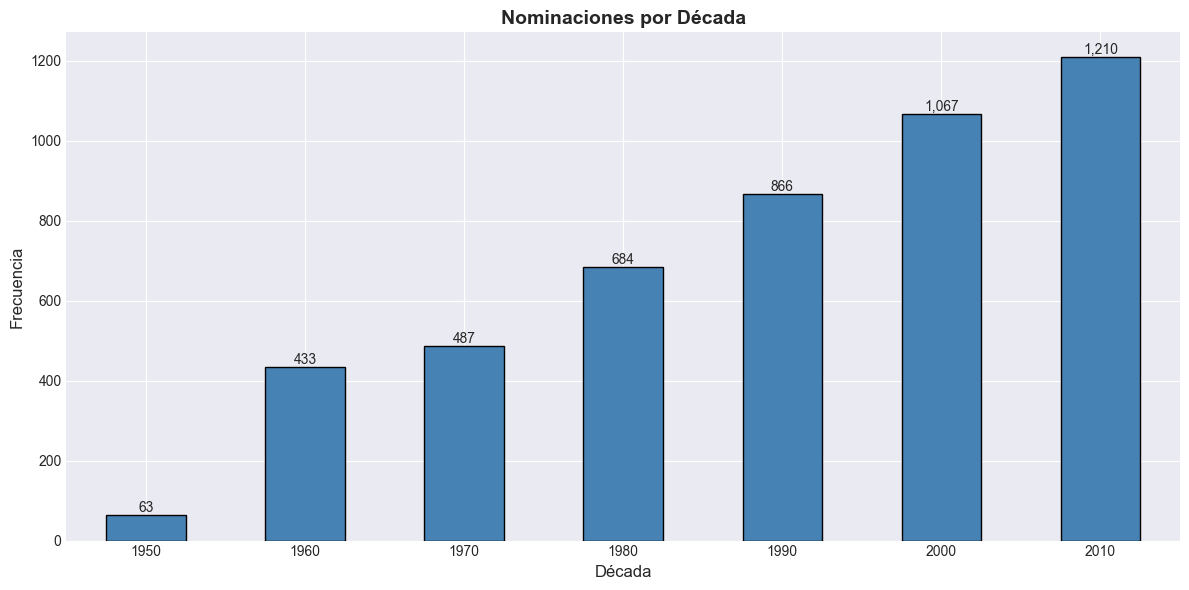

In [87]:
grammy_df['decade'] = (grammy_df['year'] // 10) * 10

plt.figure(figsize=(12, 6))
decade_counts = grammy_df['decade'].value_counts().sort_index()
decade_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Nominaciones por Década', fontsize=14, fontweight='bold')
plt.xlabel('Década', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(decade_counts.values):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

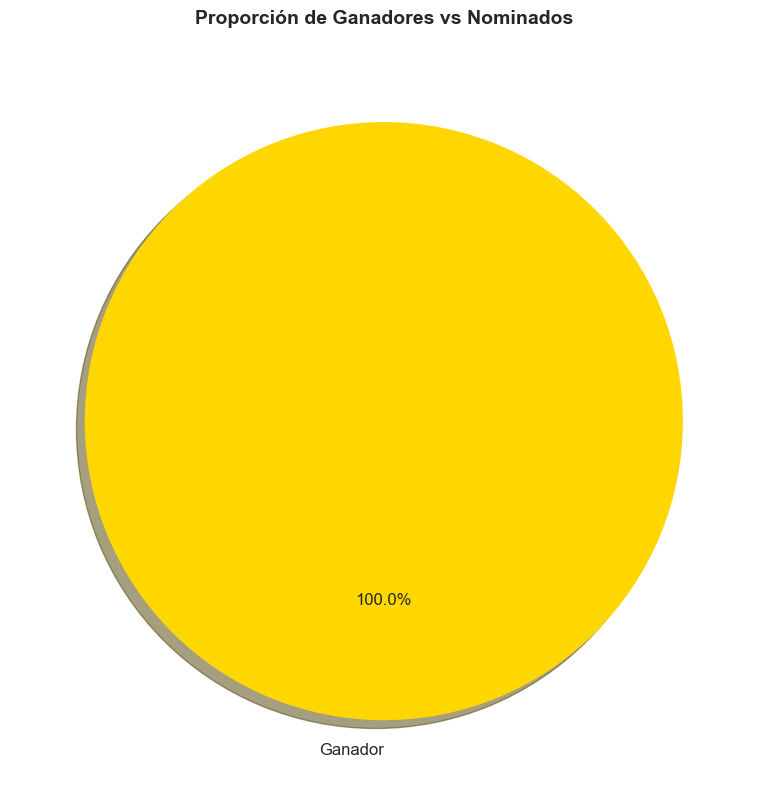

In [88]:
plt.figure(figsize=(8, 8))
winner_counts = grammy_df['winner'].value_counts()
labels = ['Ganador' if idx == True else 'No Ganador' for idx in winner_counts.index]
explode_vals = [0.05 if idx == True else 0 for idx in winner_counts.index]
colors = ['gold' if idx == True else 'lightcoral' for idx in winner_counts.index]

plt.pie(winner_counts.values, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, explode=explode_vals, shadow=True, textprops={'fontsize': 12})
plt.title('Proporción de Ganadores vs Nominados', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

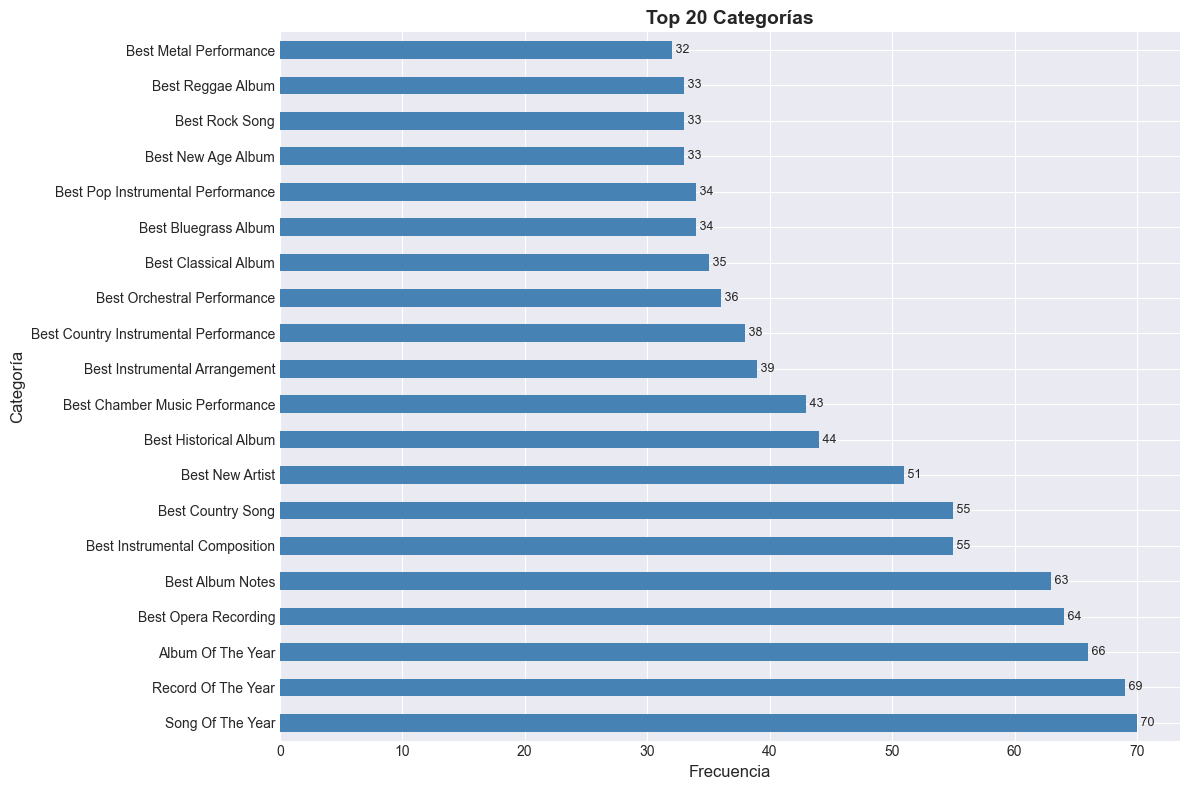

In [89]:
plt.figure(figsize=(12, 8))
category_counts = grammy_df['category'].value_counts().head(20)
category_counts.plot(kind='barh', color='steelblue')
plt.title('Top 20 Categorías', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
for i, v in enumerate(category_counts.values):
    plt.text(v, i, f' {v:,}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

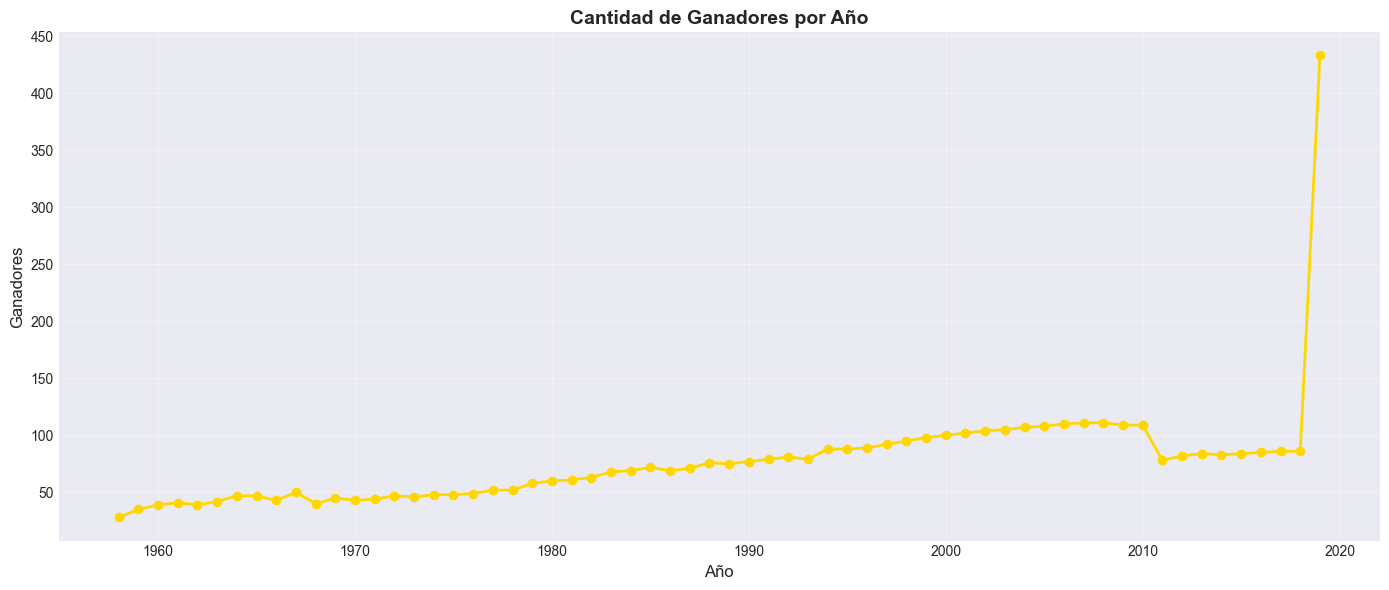

In [90]:
plt.figure(figsize=(14, 6))
winners_by_year = grammy_df[grammy_df['winner'] == True].groupby('year').size()
winners_by_year.plot(kind='line', marker='o', color='gold', linewidth=2, markersize=6)
plt.title('Cantidad de Ganadores por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ganadores', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

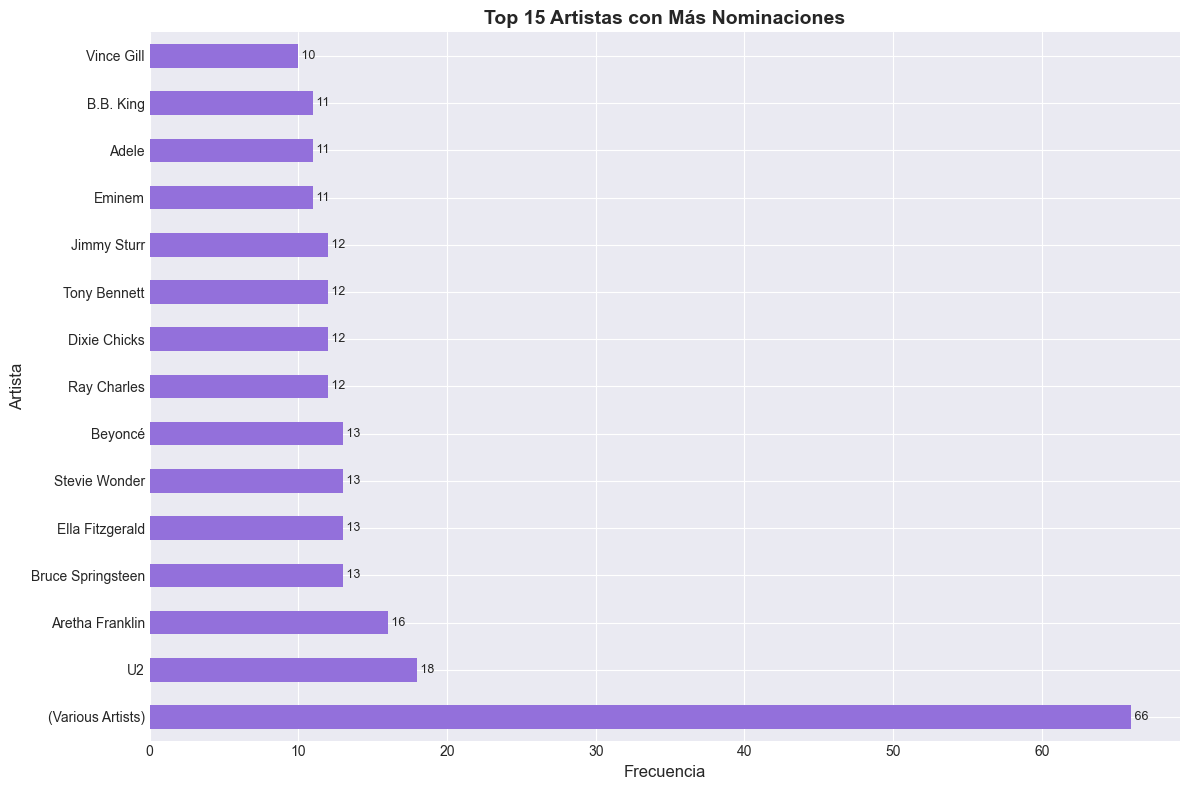

In [93]:
if 'artist' in grammy_df.columns:
    plt.figure(figsize=(12, 8))
    artist_counts = grammy_df['artist'].value_counts().head(15)
    artist_counts.plot(kind='barh', color='mediumpurple')
    plt.title('Top 15 Artistas con Más Nominaciones', fontsize=14, fontweight='bold')
    plt.xlabel('Frecuencia', fontsize=12)
    plt.ylabel('Artista', fontsize=12)
    for i, v in enumerate(artist_counts.values):
        plt.text(v, i, f' {v:,}', va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

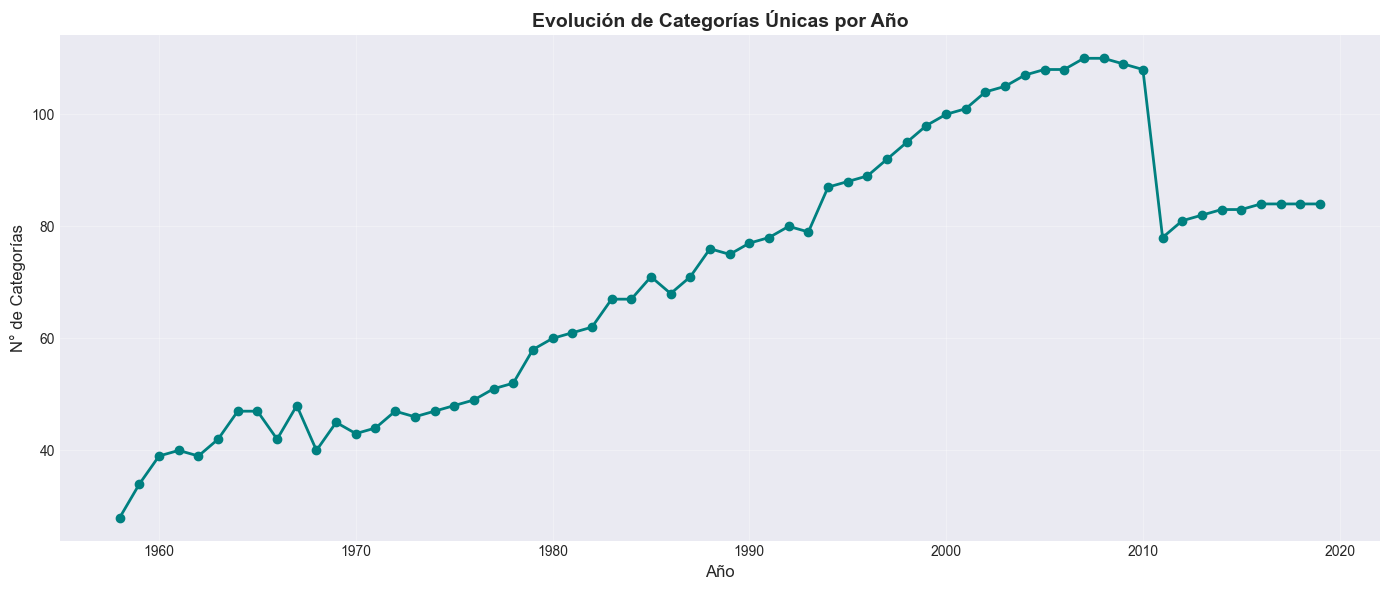

In [94]:
plt.figure(figsize=(14, 6))
unique_cats_by_year = grammy_df.groupby('year')['category'].nunique()
unique_cats_by_year.plot(kind='line', marker='o', color='teal', linewidth=2, markersize=6)
plt.title('Evolución de Categorías Únicas por Año', fontsize=14, fontweight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('N° de Categorías', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
genre_counts = spotify_df['track_genre'].value_counts().head(20)
genre_counts.plot(kind='barh', color='steelblue')
plt.title('Top 20 Géneros', fontsize=14, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Género', fontsize=12)
for i, v in enumerate(genre_counts.values):
    plt.text(v, i, f' {v:,}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

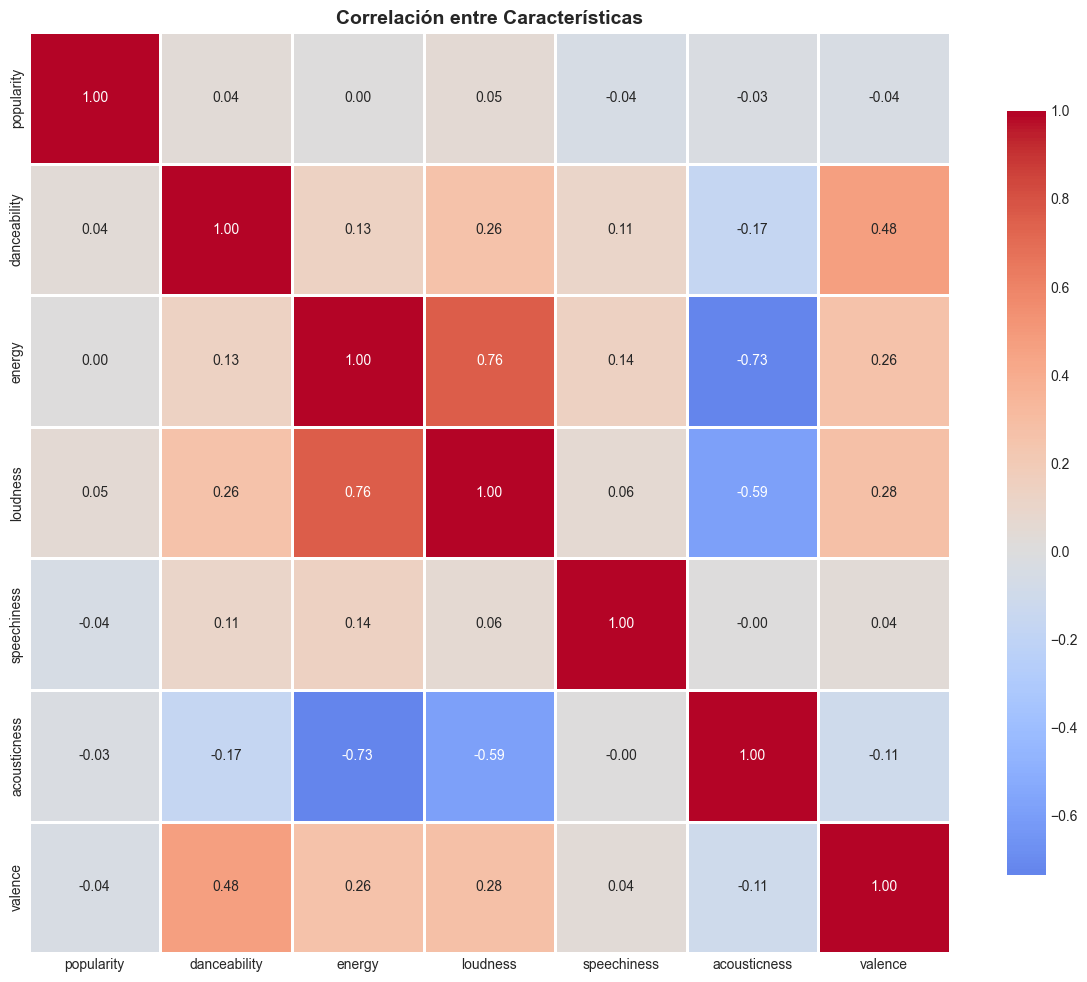

In [104]:
plt.figure(figsize=(12, 10))
corr_features = ['popularity', 'danceability', 'energy', 'loudness', 
                 'speechiness', 'acousticness', 'valence']
corr_matrix = spotify_df[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlación entre Características', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

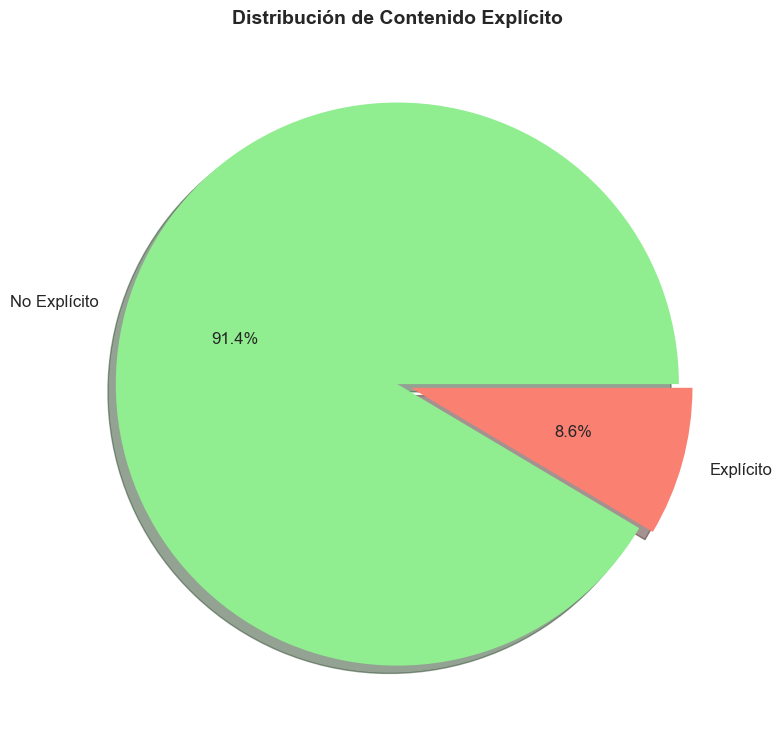

In [105]:
plt.figure(figsize=(8, 8))
explicit_counts = spotify_df['explicit'].value_counts()
labels = ['Explícito' if idx == True else 'No Explícito' for idx in explicit_counts.index]
explode_vals = [0.05 if idx == True else 0 for idx in explicit_counts.index]
colors = ['salmon' if idx == True else 'lightgreen' for idx in explicit_counts.index]

plt.pie(explicit_counts.values, labels=labels, autopct='%1.1f%%',
        colors=colors, explode=explode_vals, shadow=True, textprops={'fontsize': 12})
plt.title('Distribución de Contenido Explícito', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

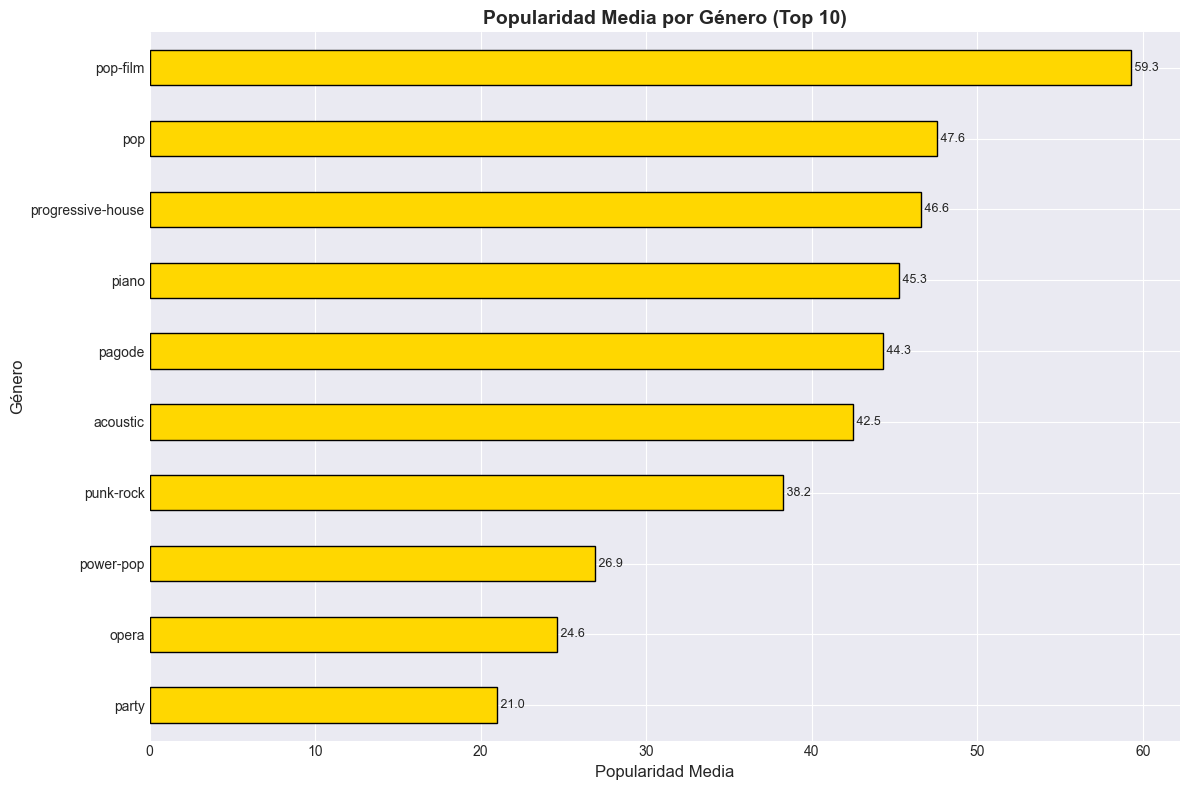

In [106]:
plt.figure(figsize=(12, 8))
top_10_genres = spotify_df['track_genre'].value_counts().head(10).index
genre_popularity = spotify_df[spotify_df['track_genre'].isin(top_10_genres)].groupby('track_genre')['popularity'].mean().sort_values(ascending=True)
genre_popularity.plot(kind='barh', color='gold', edgecolor='black')
plt.title('Popularidad Media por Género (Top 10)', fontsize=14, fontweight='bold')
plt.xlabel('Popularidad Media', fontsize=12)
plt.ylabel('Género', fontsize=12)
for i, v in enumerate(genre_popularity.values):
    plt.text(v, i, f' {v:.1f}', va='center', fontsize=9)
plt.tight_layout()
plt.show()

## Distribuciones

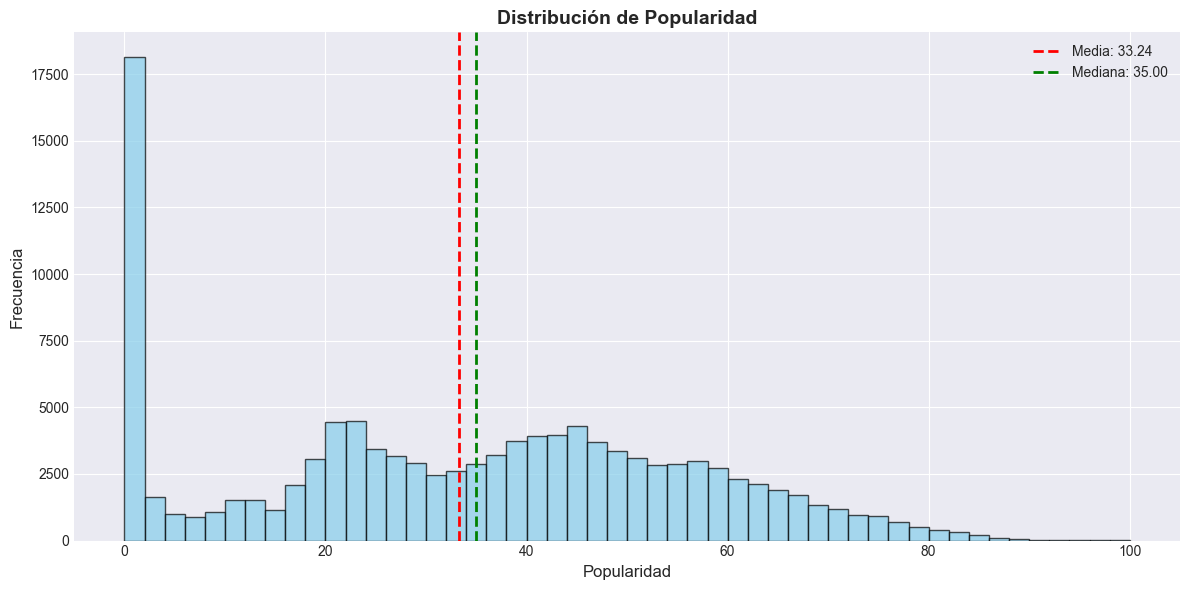

In [95]:
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['popularity'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Popularidad', fontsize=14, fontweight='bold')
plt.xlabel('Popularidad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['popularity'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["popularity"].mean():.2f}')
plt.axvline(spotify_df['popularity'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["popularity"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

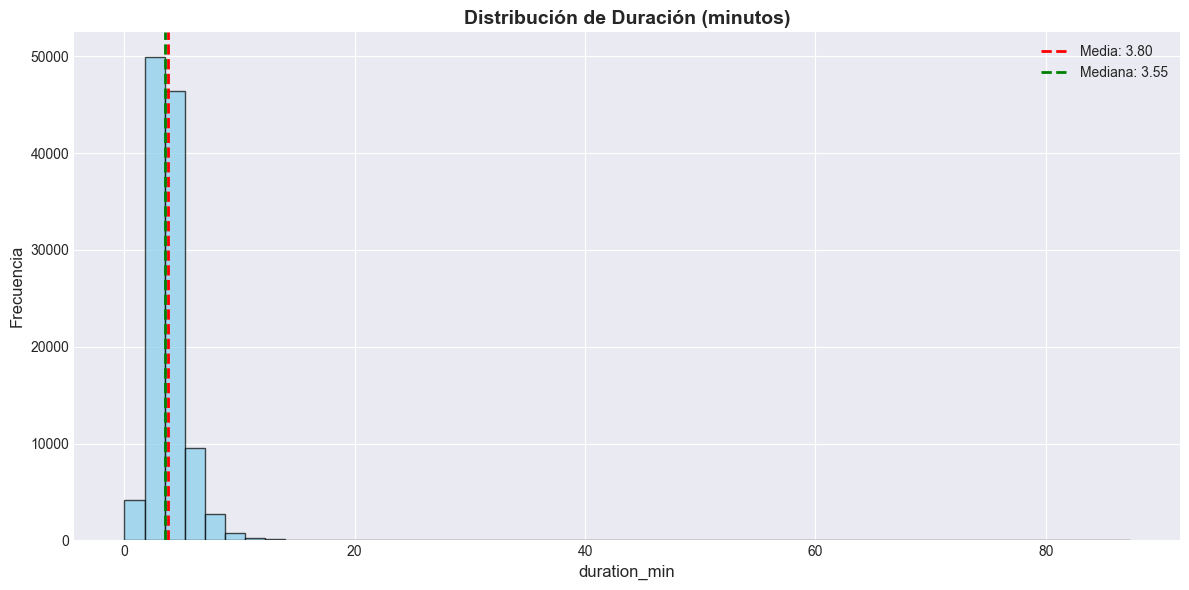

In [97]:
spotify_df['duration_min'] = spotify_df['duration_ms'] / 60000
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['duration_min'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Duración (minutos)', fontsize=14, fontweight='bold')
plt.xlabel('duration_min', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['duration_min'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["duration_min"].mean():.2f}')
plt.axvline(spotify_df['duration_min'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["duration_min"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

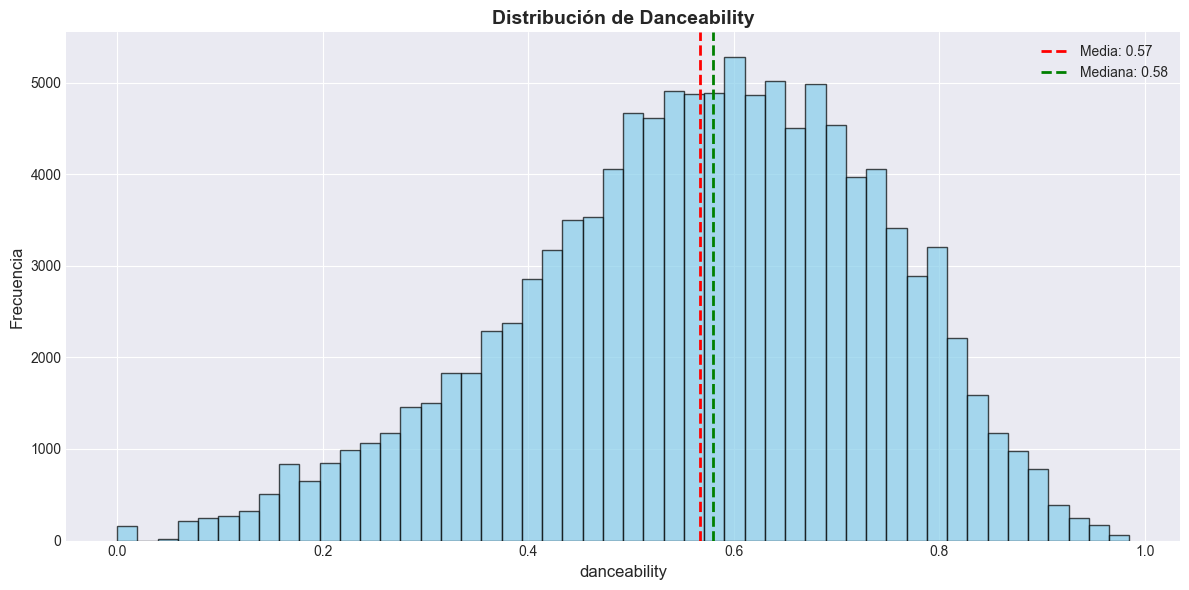

In [98]:
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['danceability'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Danceability', fontsize=14, fontweight='bold')
plt.xlabel('danceability', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['danceability'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["danceability"].mean():.2f}')
plt.axvline(spotify_df['danceability'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["danceability"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

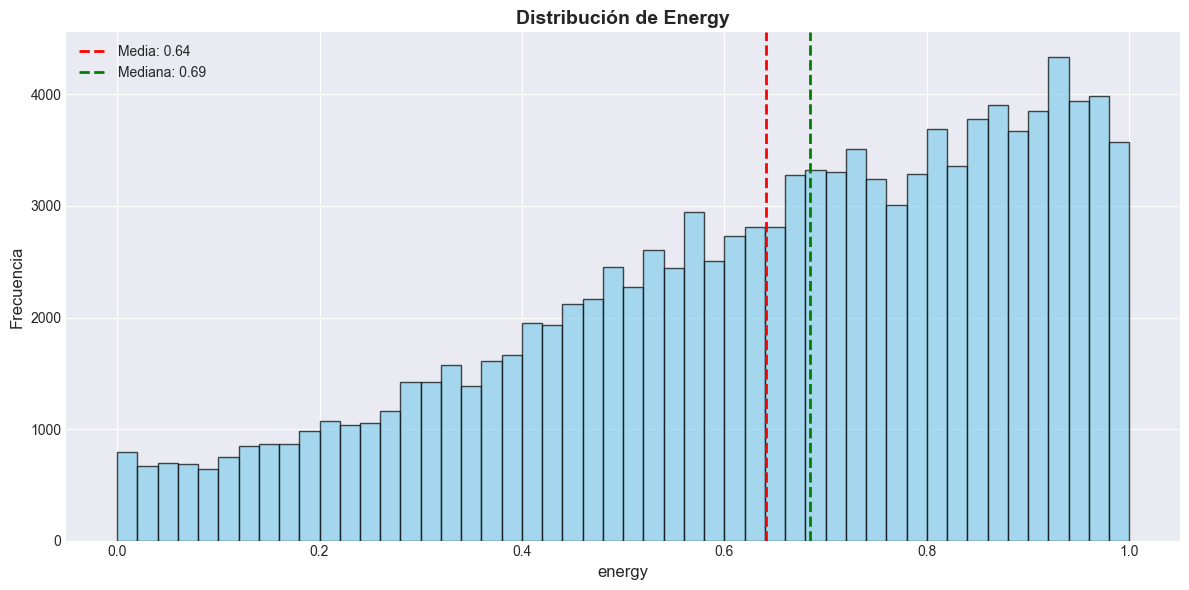

In [99]:
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['energy'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Energy', fontsize=14, fontweight='bold')
plt.xlabel('energy', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['energy'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["energy"].mean():.2f}')
plt.axvline(spotify_df['energy'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["energy"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

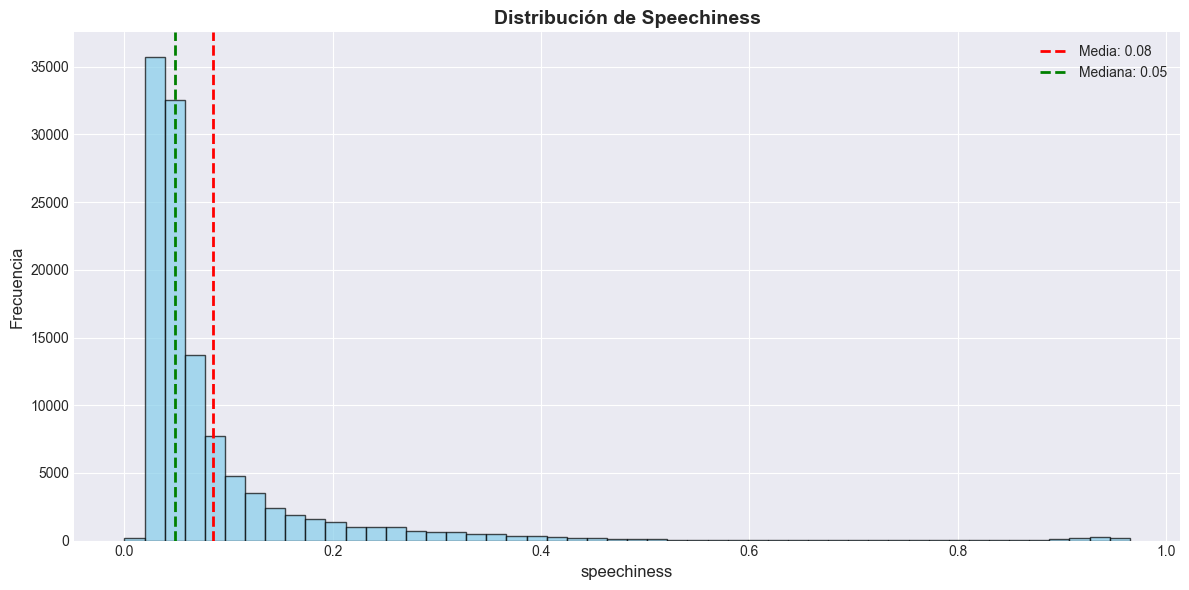

In [100]:
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['speechiness'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Speechiness', fontsize=14, fontweight='bold')
plt.xlabel('speechiness', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['speechiness'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["speechiness"].mean():.2f}')
plt.axvline(spotify_df['speechiness'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["speechiness"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

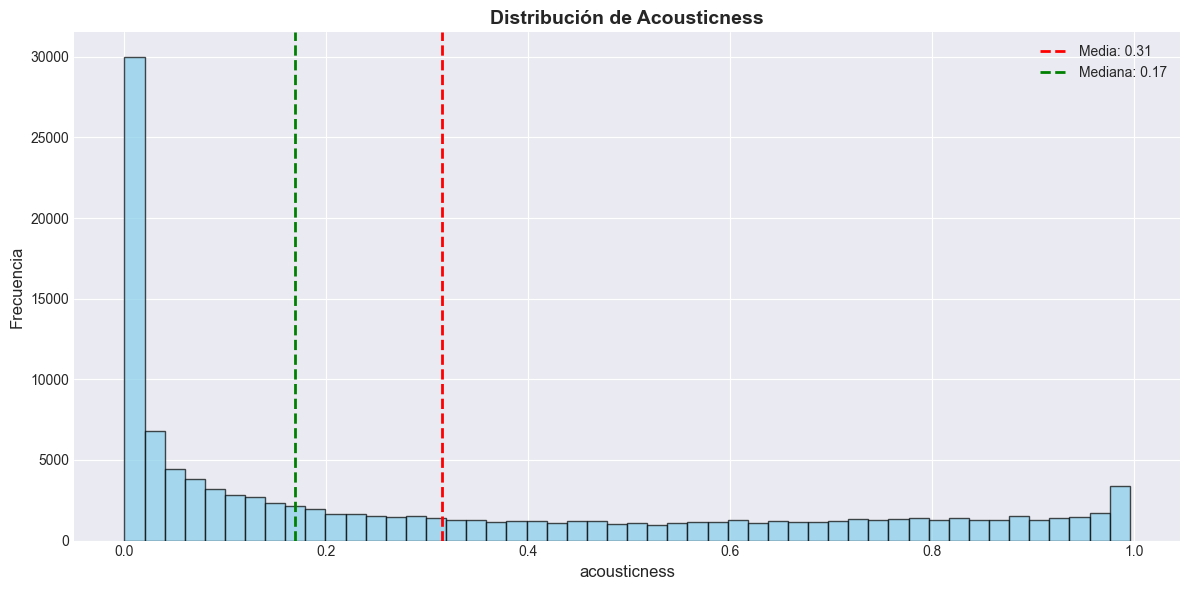

In [101]:
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['acousticness'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Acousticness', fontsize=14, fontweight='bold')
plt.xlabel('acousticness', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['acousticness'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["acousticness"].mean():.2f}')
plt.axvline(spotify_df['acousticness'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["acousticness"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

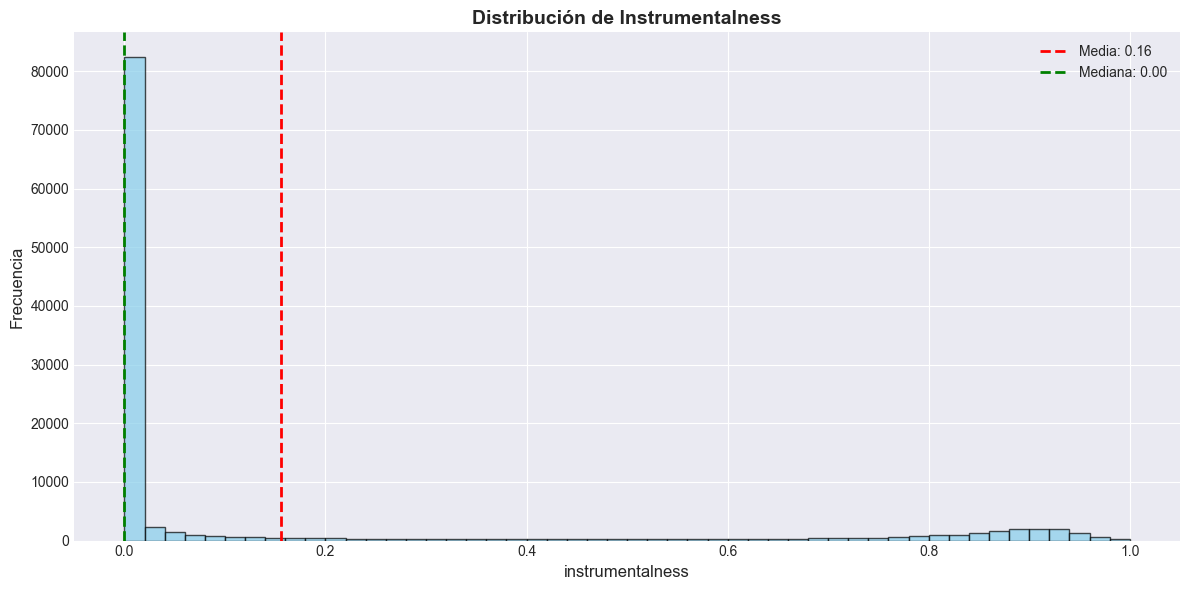

In [102]:
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['instrumentalness'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Instrumentalness', fontsize=14, fontweight='bold')
plt.xlabel('instrumentalness', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['instrumentalness'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["instrumentalness"].mean():.2f}')
plt.axvline(spotify_df['instrumentalness'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["instrumentalness"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


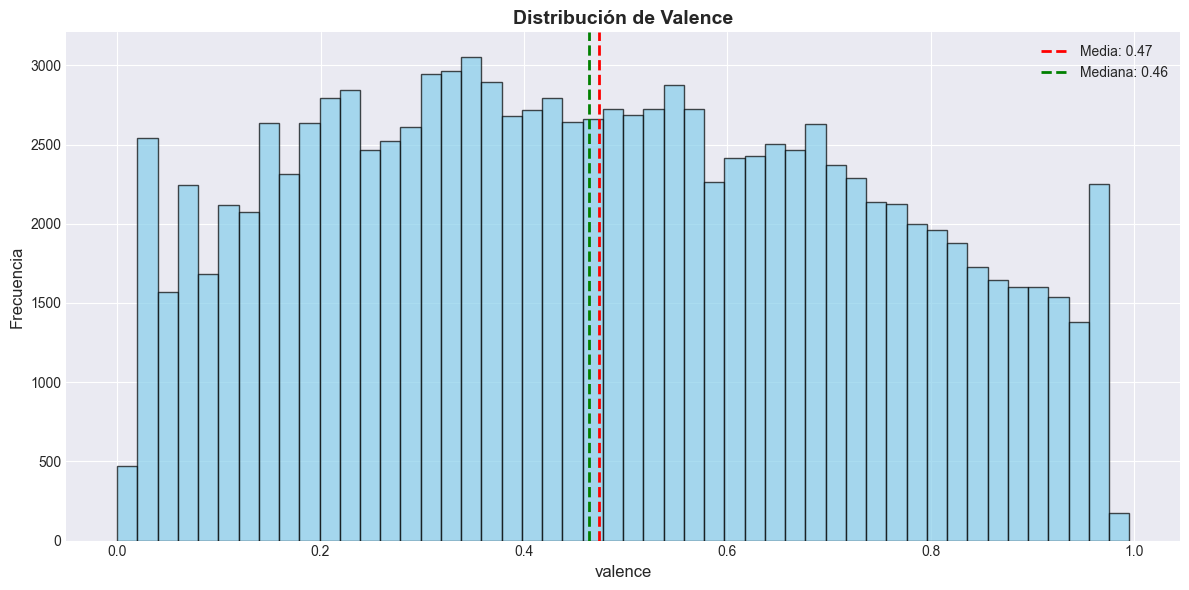

In [103]:
plt.figure(figsize=(12, 6))
plt.hist(spotify_df['valence'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribución de Valence', fontsize=14, fontweight='bold')
plt.xlabel('valence', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(spotify_df['valence'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {spotify_df["valence"].mean():.2f}')
plt.axvline(spotify_df['valence'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Mediana: {spotify_df["valence"].median():.2f}')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()